<a href="https://colab.research.google.com/github/HathawayQAQ/COMP551-Machine-Learning/blob/main/Assignment2/Comp_551_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

from scipy.stats import norm
# Set random seed for reproducibility
np.random.seed(42)

## Task 1: Linear Regression with Non-Linear Basis Functions

### 1. Data Generation:

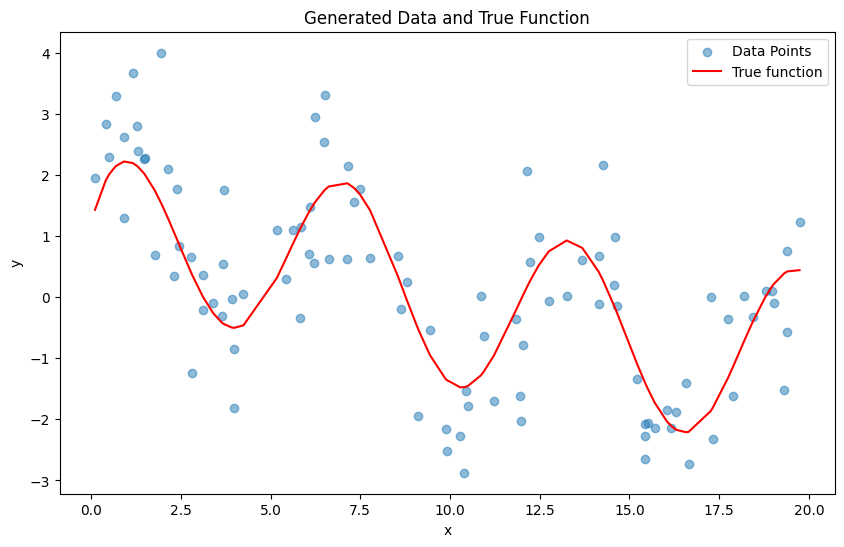

In [2]:
# Step 1: Data Generation
def generate_data(n_samples=100):
    x = np.random.uniform(0, 20, n_samples)
    y = np.sin(np.sqrt(x)) + np.cos(x) + np.sin(x) + np.random.normal(0, 1, n_samples)
    return x, y

x, y = generate_data()

# Plot the generated data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Data Points')
plt.plot(np.sort(x), np.sin(np.sqrt(np.sort(x))) + np.cos(np.sort(x)) + np.sin(np.sort(x)),
         color='r', label='True function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data and True Function')
plt.legend()
plt.show()

### 2. Non-Linear Basis Functions:

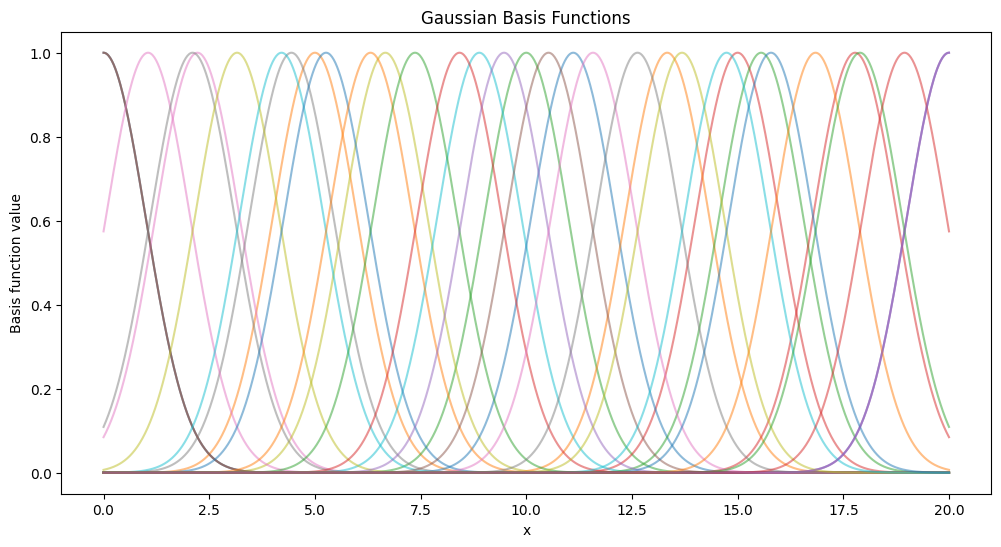

In [3]:
# Step 2: Non-Linear Basis Functions

def gaussian_basis(x, mu, sigma=1):
    return np.exp(-((x[:, None] - mu) ** 2) / (2* sigma ** 2))


# Plot Gaussian basis functions
x_plot = np.linspace(0, 20, 1000)
plt.figure(figsize=(12, 6))
for n_basis in [5, 10, 20]:
    centers = np.linspace(x_plot.min(), x_plot.max(), n_basis)
    for mu in centers:
        plt.plot(x_plot, gaussian_basis(x_plot, mu), alpha=0.5)
plt.title('Gaussian Basis Functions')
plt.xlabel('x')
plt.ylabel('Basis function value')
plt.show()

### 3. Model Fitting:

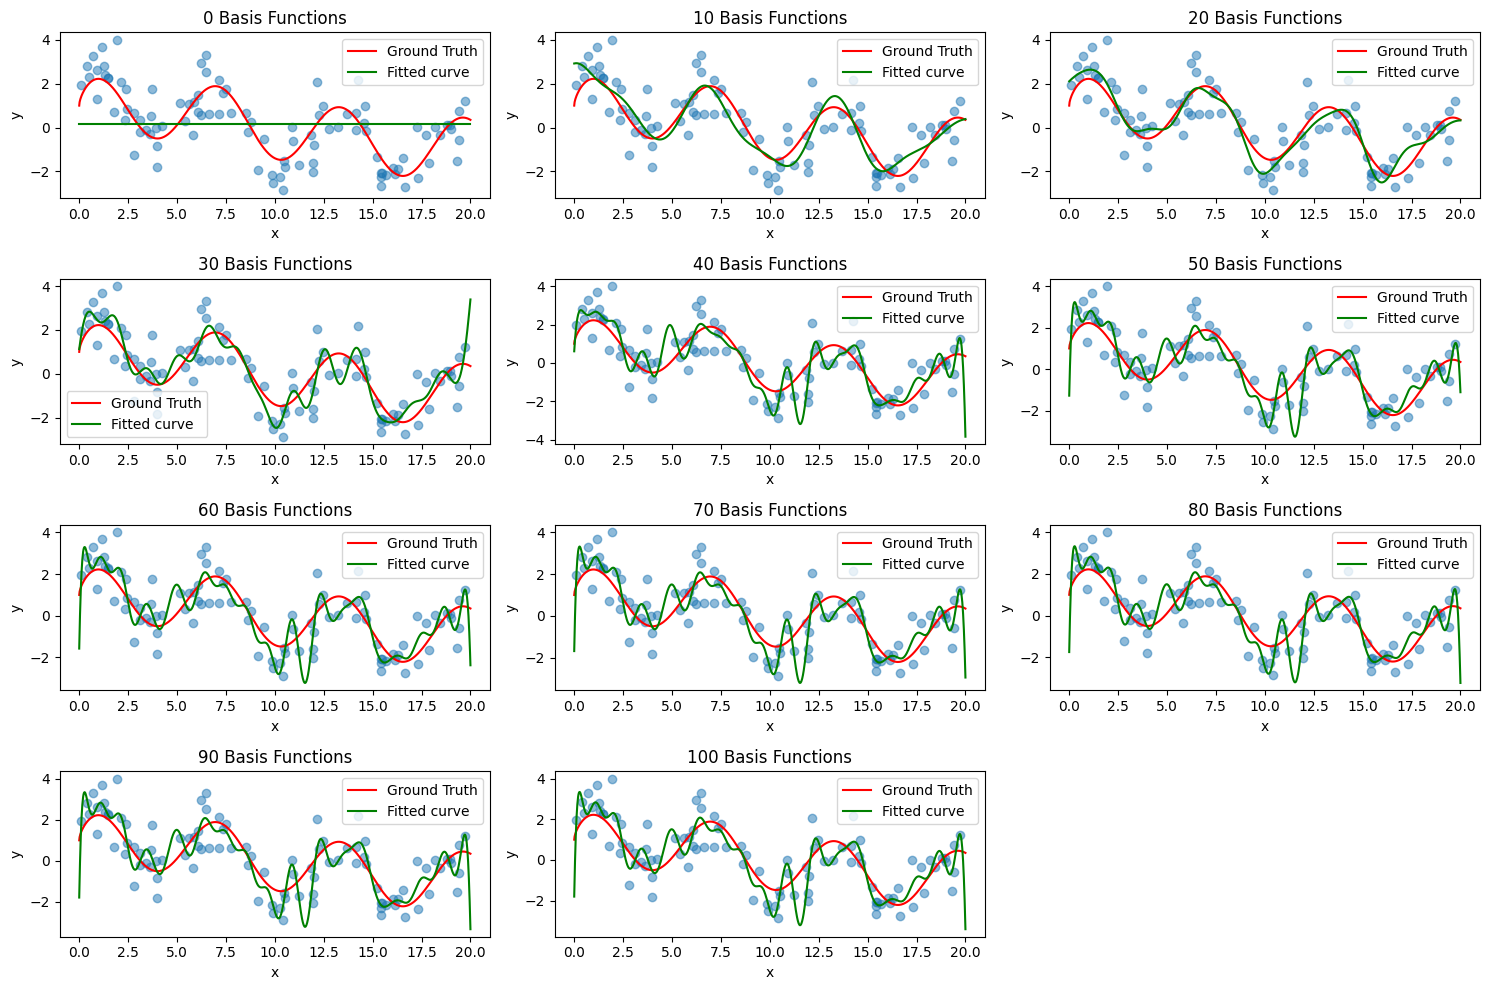

In [4]:
def fit_model(X, y):
    # Use pseudoinverse instead of the inverse for better numerical stability
    return np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

def create_design_matrix(x, n_bases):
    if n_bases == 0:
        return np.ones((len(x), 1))
    return np.column_stack([gaussian_basis(x, mu) for mu in np.linspace(0, 20, n_bases)])

def predict(X, weights):
    return X.dot(weights)
# x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

train_errors = []
val_errors = []
n_bases_range = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
x_plot = np.sort(np.linspace(0, 20, 1000))
y_true = np.sin(np.sqrt(x_plot)) + np.cos(x_plot) + np.sin(x_plot)
plt.figure(figsize=(15, 10))
for i, n_basis in enumerate(n_bases_range, 1):
    X = create_design_matrix(x, n_basis)
    weights = fit_model(X, y)

    X_plot = create_design_matrix(x_plot, n_basis)
    y_pred = predict(X_plot, weights)

    plt.subplot(4, 3, i)
    plt.scatter(x, y, alpha=0.5)
    plt.plot(x_plot, y_true, color='r', label='Ground Truth')
    plt.plot(x_plot, y_pred, color='g', label='Fitted curve')
    plt.title(f'{n_basis} Basis Functions')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()

### 4. Model Selection:

In [6]:
# Step 4: Model Selection
def split_data(x, y, train_ratio=0.8):
    n = len(x)
    n_train = int(n * train_ratio)
    indices = np.random.permutation(n)
    train_idx, val_idx = indices[:n_train], indices[n_train:]
    return x[train_idx], y[train_idx], x[val_idx], y[val_idx]

def compute_sse(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

x_train, y_train, x_val, y_val = split_data(x, y)

train_errors = []
val_errors = []
n_basis_range = range(0, 31, 1)

for n_basis in n_basis_range:
    X_train = create_basis_functions(x_train, n_basis)
    X_val = create_basis_functions(x_val, n_basis)

    weights = fit_model(X_train, y_train)

    y_train_pred = predict(X_train, weights)
    y_val_pred = predict(X_val, weights)

    train_errors.append(compute_sse(y_train, y_train_pred))
    val_errors.append(compute_sse(y_val, y_val_pred))

optimal_n_basis = n_basis_range[np.argmin(val_errors)]

plt.figure(figsize=(10, 6))
plt.plot(n_basis_range, train_errors, label='Training Error')
plt.plot(n_basis_range, val_errors, label='Validation Error')
plt.axvline(optimal_n_basis, color='r', linestyle='--', label=f'Optimal ({optimal_n_basis} bases)')
plt.xlabel('Number of Basis Functions')
plt.ylabel('Sum of Squared Errors')
plt.title('Model Selection: Training vs Validation Error')
plt.legend()
plt.show()

print(f"The optimal number of basis functions is: {optimal_n_basis}")

NameError: name 'create_basis_functions' is not defined

## Task 2: Bias-Variance Tradeoff with Multiple Fits

## Task 3: Regularization with Cross-Validation (Hathaway)

### 1. Adding Regularization:

In [33]:
# Function to generate synthetic data
def generate_data(n_points = 100):
    x = np.random.uniform(0, 20, n_points)
    noise = np.random.normal(0, 1, n_points)
    y = np.sin(np.sqrt(x)) + np.cos(x) + np.sin(x) + noise
    return x, y

# Function to create Gaussian basis functions
def gaussian_basis_functions(x, centers, width = 1.0):
    return np.exp(-(x[:, np.newaxis] - centers[np.newaxis, :]) **2 / (2 * width **2))

# Function to fit the model with regularization (L1 or L2)
def fit_model(X_train, y_train, X_test, y_test, lambd, reg_type='L2'):
    if reg_type == 'L2':
        model = Ridge(alpha = lambd)
    elif reg_type == 'L1':
        model = Lasso(alpha = lambd)

    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)

    return train_mse, test_mse


### 2. Cross-Validation:

In [14]:
# Use 10-fold cross-validation
def cross_validation(X, y, lambd_values, reg_type = 'L2', n_folds = 10):
    kf = KFold(n_splits = n_folds, shuffle = True, random_state = 42)

    train_errors = []
    test_errors = []

    for lambd in lambd_values:
        fold_train_errors = []
        fold_test_errors = []

        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            train_mse, test_mse = fit_model(X_train, y_train, X_test, y_test, lambd, reg_type=reg_type)
            fold_train_errors.append(train_mse)
            fold_test_errors.append(test_mse)

        train_errors.append(np.mean(fold_train_errors))
        test_errors.append(np.mean(fold_test_errors))

    return train_errors, test_errors


### 3. Plotting Train and Test Errors:

In [22]:
# Function to plot training and test errors for both L1 and L2 regularization
def plot_train_test_errors(lambd_values, train_errors_l1, test_errors_l1, train_errors_l2, test_errors_l2):
    plt.figure(figsize = (10, 6))
    plt.plot(lambd_values, train_errors_l2, label='Train Error (L2)', color = 'blue')
    plt.plot(lambd_values, test_errors_l2, label='Test Error (L2)', color = 'green')
    plt.plot(lambd_values, train_errors_l1, label='Train Error (L1)', color = 'orange')
    plt.plot(lambd_values, test_errors_l1, label='Test Error (L1)', color = 'red')
    plt.xscale('log')
    plt.xlabel('Lambda (Regularization Strength)')
    plt.ylabel('Mean Squared Error')
    plt.title('Train/Test Error vs Lambda for L1 and L2 Regularization')
    plt.legend()
    plt.grid(True)
    plt.show()


### 4. Plotting Bias-Variance Decomposition:

In [23]:
# Bias-variance decomposition plotting
def plot_bias_variance_decomposition(lambd_values, train_errors, test_errors, noise_variance=1.0):
    bias_squared = np.square(np.mean(train_errors) - np.mean(test_errors))
    variance = np.var(test_errors)
    total_error = bias_squared + variance + noise_variance

    plt.figure(figsize=(10, 6))
    plt.plot(lambd_values, bias_squared * np.ones_like(lambd_values), label = 'Bias^2', color = 'blue')
    plt.plot(lambd_values, variance * np.ones_like(lambd_values), label = 'Variance', color = 'green')
    plt.plot(lambd_values, total_error * np.ones_like(lambd_values), label = 'Bias^2 + Variance + Noise', color = 'red')
    plt.xscale('log')
    plt.xlabel('Lambda (Regularization Strength)')
    plt.ylabel('Error')
    plt.title('Bias-Variance Decomposition')
    plt.legend()
    plt.grid(True)
    plt.show()


### 5. Selecting the Optimal λ:

In [24]:
def select_optimal_lambda(lambd_values, test_errors_l1, test_errors_l2):
    min_l1_lambda = lambd_values[np.argmin(test_errors_l1)]
    min_l2_lambda = lambd_values[np.argmin(test_errors_l2)]
    print(f'Optimal lambda for L1 regularization: {min_l1_lambda}')
    print(f'Optimal lambda for L2 regularization: {min_l2_lambda}')


### Run the Experiment:

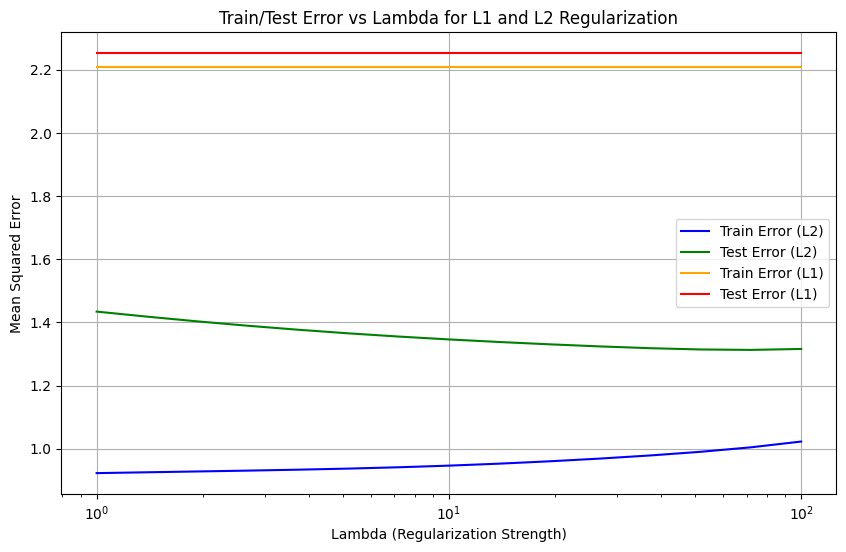

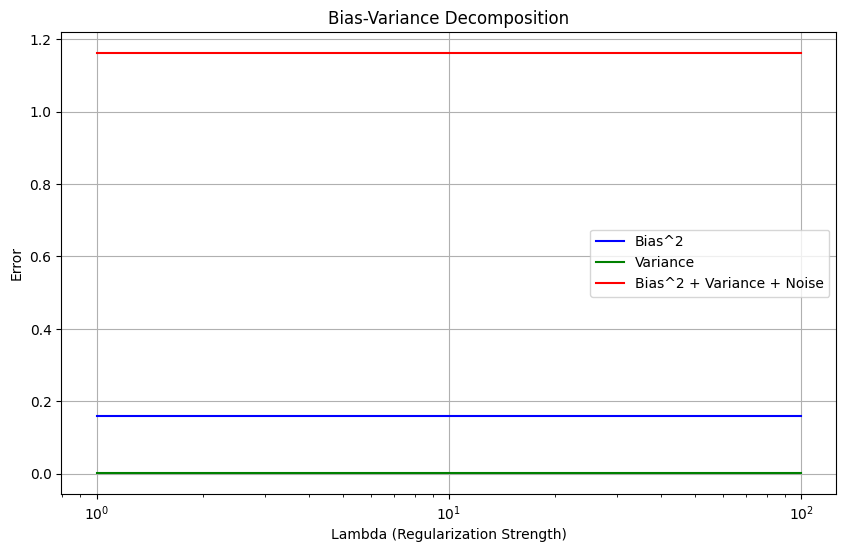

Optimal lambda for L1 regularization: 1.0
Optimal lambda for L2 regularization: 71.96856730011518


In [36]:
def run_experiment():
    # Generate data
    x, y = generate_data()

    # Modify the existing linear regression model with Gaussion basis number 70
    D = 70
    centers = np.linspace(0, 20, D)
    X = gaussian_basis_functions(x, centers)

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Lambda values for regularization
    lambd_values = np.logspace(0, 2, 15)

    # Run cross-validation for L1 and L2 regularization
    train_errors_l2, test_errors_l2 = cross_validation(X, y, lambd_values, reg_type='L2')
    train_errors_l1, test_errors_l1 = cross_validation(X, y, lambd_values, reg_type='L1')

    # Plot Train and Test errors
    plot_train_test_errors(lambd_values, train_errors_l1, test_errors_l1, train_errors_l2, test_errors_l2)

    # Plot bias-variance decomposition
    plot_bias_variance_decomposition(lambd_values, train_errors_l2, test_errors_l2)

    # Select optimal lambda
    select_optimal_lambda(lambd_values, test_errors_l1, test_errors_l2)

run_experiment()


## Task 4: Effect of L1 and L2 Regularization on Loss

### 1. Generating Synthetic Data

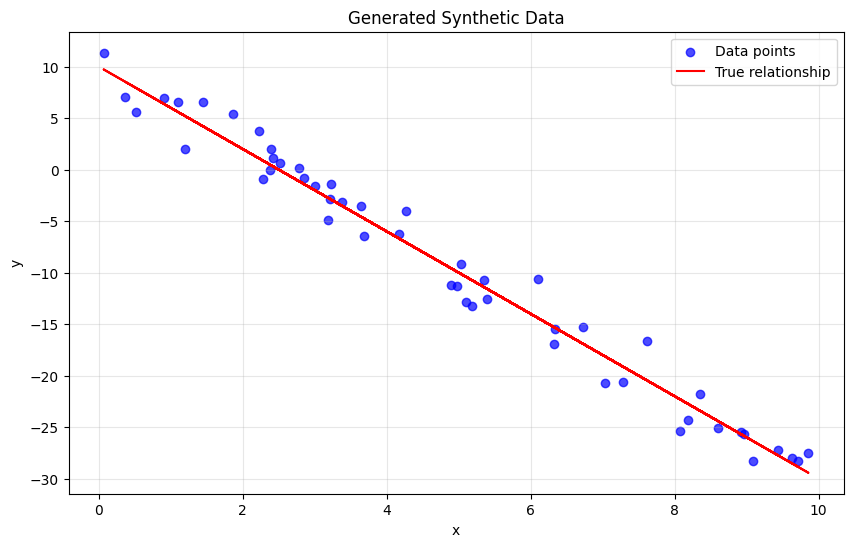

In [ ]:
x = np.random.uniform(0, 10, 50)
epsilon = np.random.normal(0, 1, 50)
y = -4 * x + 10 + 2 * epsilon

# Plot the generated data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Data points')
plt.plot(x, -4 * x + 10, color='red', label='True relationship')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Synthetic Data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 2. Applying L1 and L2 Regularization

In [ ]:
def GradientDescent(X, y, learning_rate, num_iterations, regularization_type, lambda_):
    m, n = X.shape
    theta = np.zeros(n)
    theta_history = [theta]

    for _ in range(num_iterations):
        h = X.dot(theta)
        gradient = (1/m) * X.T.dot(h - y)

        if regularization_type == 'L1':
            gradient += lambda_ * np.sign(theta)
        elif regularization_type == 'L2':
            gradient += lambda_ * theta

        theta = theta - learning_rate * gradient
        theta_history.append(theta)

    return np.array(theta_history)

### 3. Plotting the Loss Function

In [ ]:
def plot_contour(f, x1bound, x2bound, resolution, ax):
    x1range = np.linspace(x1bound[0], x1bound[1], resolution)
    x2range = np.linspace(x2bound[0], x2bound[1], resolution)
    xg, yg = np.meshgrid(x1range, x2range)
    zg = np.zeros_like(xg)
    for i,j in itertools.product(range(resolution), range(resolution)):
        zg[i,j] = f([xg[i,j], yg[i,j]])
    ax.contour(xg, yg, zg, 100)
    return ax